# 3.1 はじめに

## 3.1.2 準備

In [2]:
#@title ライブラリの読み込み

# フィギュアの日本語対応化
!pip3 install matplotlib_fontja  # Colab上にインストール
import matplotlib_fontja

  Using cached matplotlib_fontja-1.0.0-py2.py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib_fontja-1.0.0-py2.py3-none-any.whl (4.2 MB)


In [3]:
#@title 自作ライブラリのダウンロード

# GitHubレポジトリからPythonファイルをダウンロード
!wget https://github.com/CPcolloquium/cp_programming_book/raw/main/3_Biophysical-model/src/BiophysicalModelSimulator.py
!wget https://github.com/CPcolloquium/cp_programming_book/raw/main/3_Biophysical-model/src/Visualizer.py

# Colab 上に`src`ディレクトリを作成
!mkdir src

# ダウンロードしたPythonファイルを`src`ディレクトリに移動
!mv BiophysicalModelSimulator.py Visualizer.py src/

# `src`ディレクトリに保存されているファイル一覧を表示
print('ダウンロードができたか確認')
!ls -tl src/

--2024-10-26 08:53:11--  https://github.com/CPcolloquium/cp_programming_book/raw/main/3_Biophysical-model/src/BiophysicalModelSimulator.py
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CPcolloquium/cp_programming_book/main/3_Biophysical-model/src/BiophysicalModelSimulator.py [following]
--2024-10-26 08:53:11--  https://raw.githubusercontent.com/CPcolloquium/cp_programming_book/main/3_Biophysical-model/src/BiophysicalModelSimulator.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53728 (52K) [text/plain]
Saving to: ‘BiophysicalModelSimulator.py’

BiophysicalModelSim 100%[===================>]

In [4]:
#@title 自作ライブラリの読み込み

# シミュレーション用の関数などのライブラリを読み込む
import src.BiophysicalModelSimulator as bms

# 可視化用の関数などのライブラリを読み込む
import src.Visualizer as vis

## 3.1.3 仮想障害シミュレーションを体験してみよう

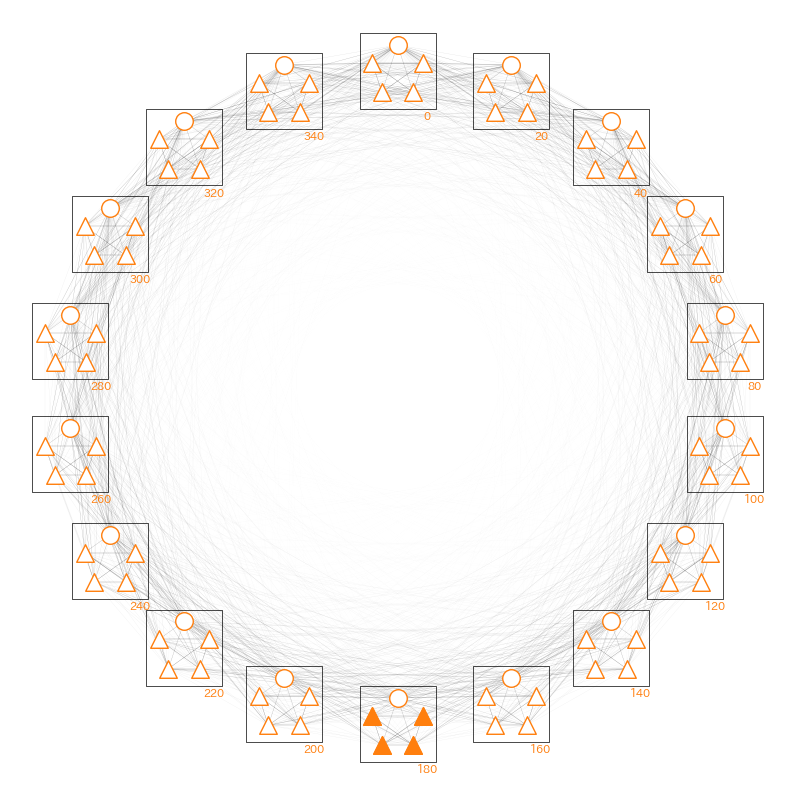

In [5]:
#@title 神経回路のアーキテクチャを構築

# 神経回路のアーキテクチャを構築
architecture = bms.generate_network_architecture(
    num_unit=90,
)

# 神経回路のアーキテクチャを可視化
vis.plot_network(
    architecture=architecture,
)

In [6]:
#@title generate_t_eval()の挙動確認

# 評価時間を定める
t_eval = bms.generate_t_eval(t_max=700)

# t_evalの値を確認
print('t_eval', t_eval)

t_eval [0.000e+00 1.000e-01 2.000e-01 ... 6.998e+02 6.999e+02 7.000e+02]


In [7]:
#@title 機能正常条件によるワーキングメモリ課題を実行する
# シミュレーションを実行
results = bms.simulate_working_memory(
    t_eval=t_eval,
    architecture=architecture,
    dysfuncs_nmda=1.0,
)

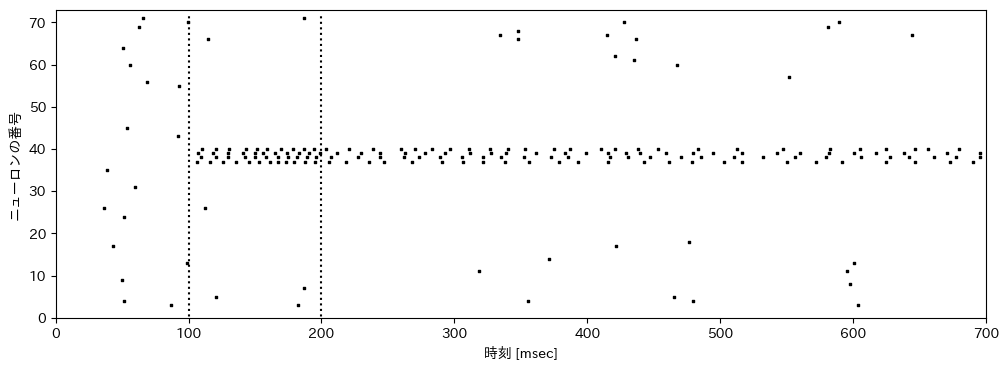

In [8]:
#@title 結果を可視化する

# ラスタグラムを表示
vis.plot_raster(
    spikes=results['spikes'][:, architecture['set_exc']],  # 興奮性細胞のみ抽出
    t_eval=t_eval,
    time_span=(100, 200),  # 100, 200ミリ秒に縦線を表示する
)

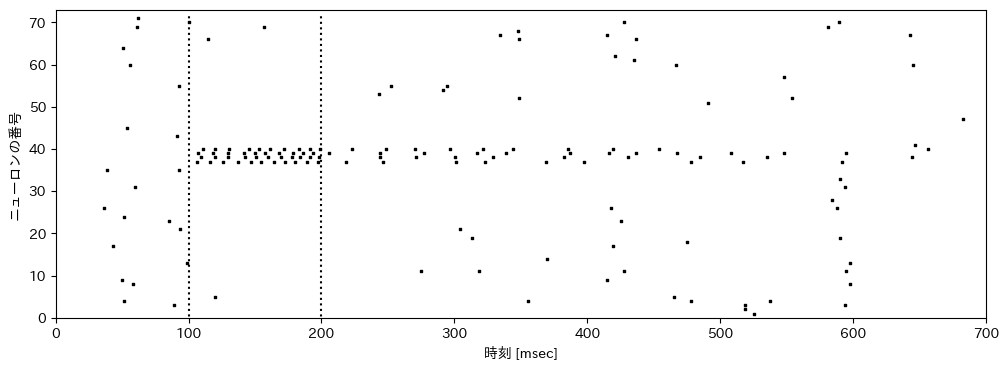

In [9]:
#@title 機能低下条件によるワーキングメモリ課題を実行する

# シミュレーションを実行
results = bms.simulate_working_memory(
    t_eval=t_eval,
    architecture=architecture,
    dysfuncs_nmda=0.7,
)

# ラスタグラムを表示
vis.plot_raster(
    spikes=results['spikes'][:, architecture['set_exc']],  # 興奮性細胞のみ抽出
    t_eval=t_eval,
    time_span=(100, 200),  # 100, 200ミリ秒に縦線を表示する
)

# 3.2 膜電位とスパイクのモデル

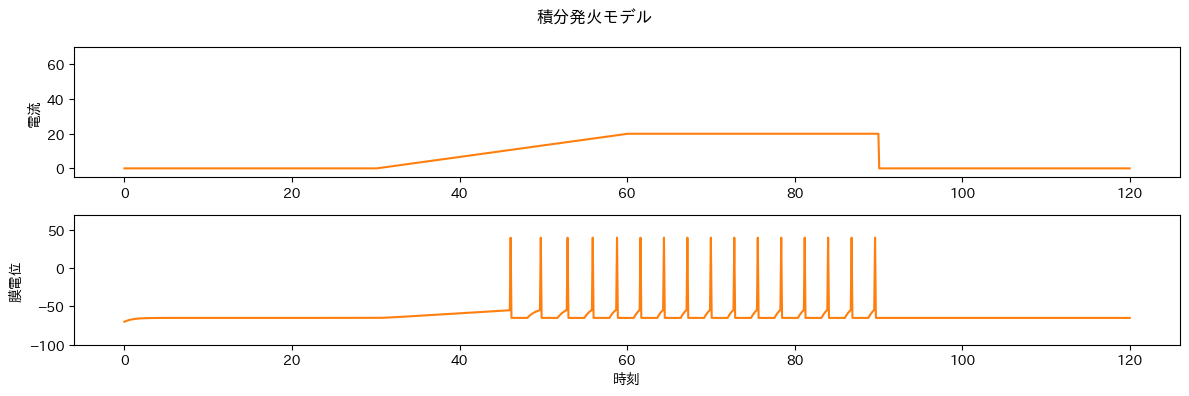

In [10]:
#@title 積分発火モデルのシミュレーションを実行する

# 評価時間を設定
t_eval = bms.generate_t_eval(t_max=120)

# 積分発火モデルのシミュレーションを実行
results = bms.simulate_lif(
    t_eval=t_eval,
    current_max=20.0,
)

# シミュレーション結果の可視化
vis.plot_current_and_potential(
    t_eval=t_eval,
    current=results['current'],
    potential=results['potential'],
    title='積分発火モデル',
)

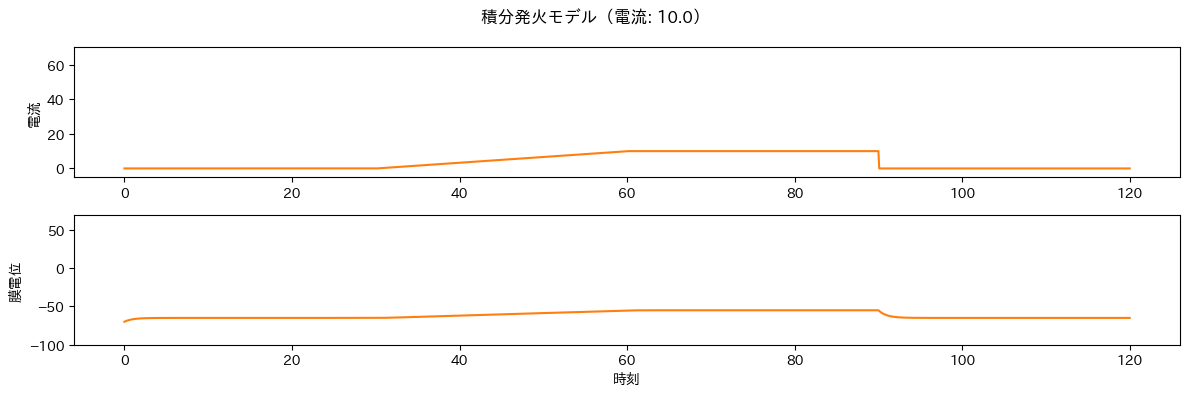

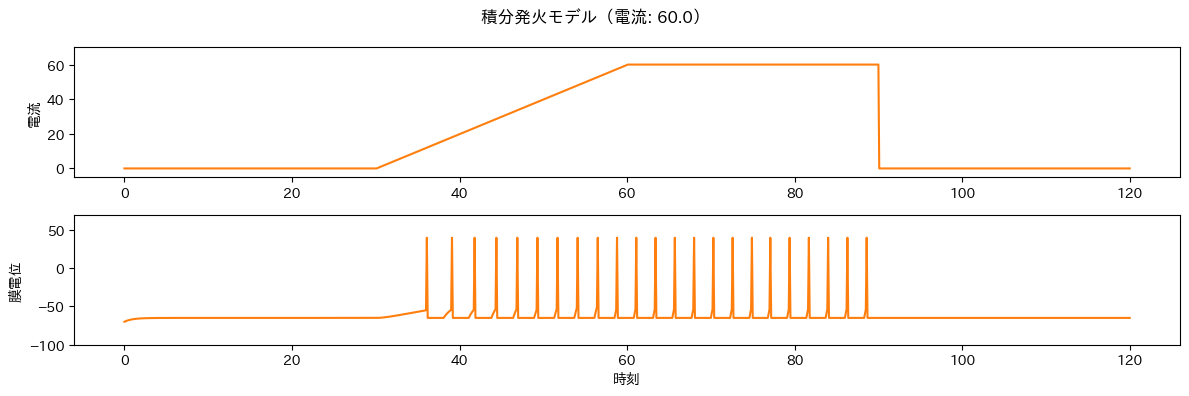

In [11]:
#@title さまざまな電流の強さを試してみる

# for文を用いてさまざまな設定でシミュレーションを行う
power_list = [10.0, 60.0]
for power in power_list:
    # 積分発火モデルのシミュレーションを実行
    results = bms.simulate_lif(
        t_eval=t_eval,
        current_max=power,
    )
    # 可視化
    vis.plot_current_and_potential(
        t_eval=t_eval,
        current=results['current'],
        potential=results['potential'],
        title='積分発火モデル（電流: {}）'.format(power),
    )

# 3.3 イオンチャネルのモデル

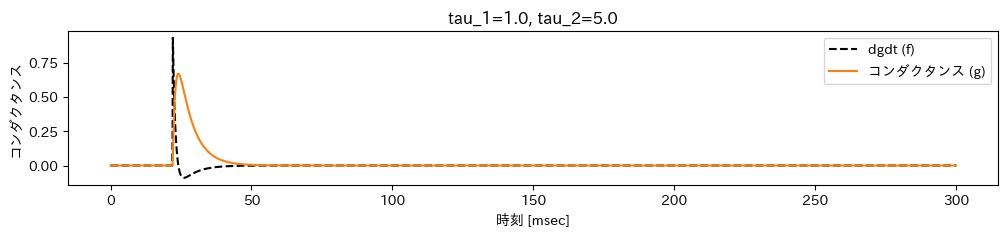

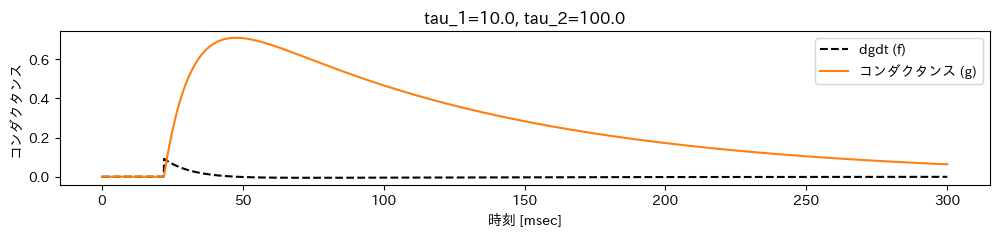

In [12]:
#@title シミュレーションを実行し可視化する

# 評価時間を定める
t_eval = bms.generate_t_eval(t_max=300)

# 設定値を定める
tau_list = [
    [1.0, 5.0], # AMPA/GABAの設定値
    [10.0, 100.0],  # NMDAの設定値
]

for tau_1, tau_2 in tau_list:
    # 実行
    results = bms.simulate_channel(
        t_eval=t_eval,
        tau_1=tau_1,
        tau_2=tau_2,
    )

    # 結果の可視化
    vis.plot_conductance(
        t_eval=t_eval,
        cond_diff=results['f_receptor'],
        conductances=results['g_receptor'],
        title='tau_1={}, tau_2={}'.format(
            tau_1, tau_2
        ),
    )

# 3.4 NMDA受容体付き神経細胞

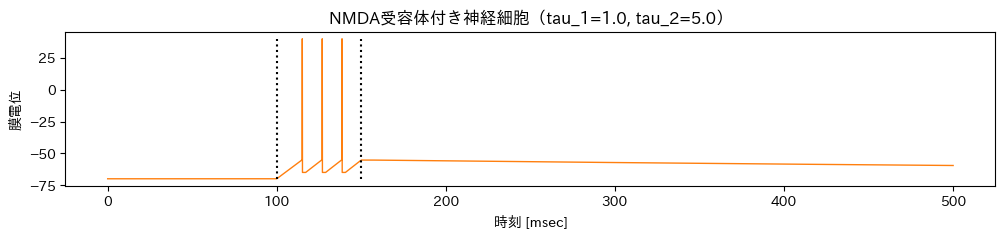

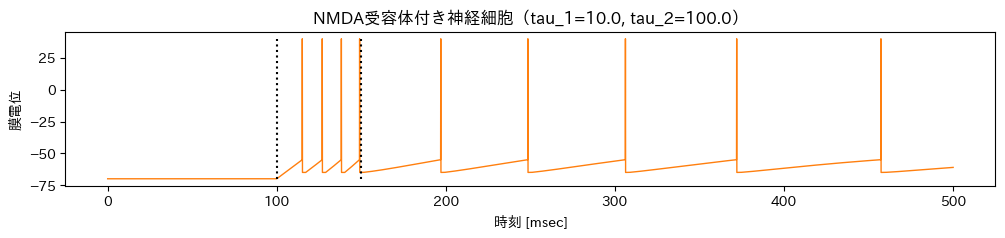

In [13]:
#@title シミュレーションを実行し可視化する
# 評価時間を定める
t_eval = bms.generate_t_eval(t_max=500)

# 設定値を定める
tau_list = [
    [1.0, 5.0], # AMPA/GABAの設定値
    [10.0, 100.0],  # NMDAの設定値
]

for tau_1, tau_2 in tau_list:
    # 実行
    results = bms.simulate_nmda_unit(
        t_eval=t_eval,
        weight=4.0,
        tau_1=tau_1,
        tau_2=tau_2,
    )

    # 可視化
    vis.plot_potentials(
        t_eval=t_eval,
        potentials=results['potentials'],
        time_span=(100, 150),
        title='NMDA受容体付き神経細胞（tau_1={}, tau_2={}）'.format(
            tau_1, tau_2
        ),
    )

# 3.5 ワーキングメモリモデル

## ネットワークのアーキテクチャ

神経細胞の総数: 90 
興奮性神経細胞の総数: 72 
抑制性神経細胞の総数: 18 

神経細胞の位置（角度）:
 [0.0, 0.0, 0.0, 0.0, 20.0, 20.0, 20.0, 20.0, 40.0, 40.0, 40.0, 40.0, 60.0, 60.0, 60.0, 60.0, 80.0, 80.0, 80.0, 80.0, 100.0, 100.0, 100.0, 100.0, 120.0, 120.0, 120.0, 120.0, 140.0, 140.0, 140.0, 140.0, 160.0, 160.0, 160.0, 160.0, 180.0, 180.0, 180.0, 180.0, 200.0, 200.0, 200.0, 200.0, 220.0, 220.0, 220.0, 220.0, 240.0, 240.0, 240.0, 240.0, 260.0, 260.0, 260.0, 260.0, 280.0, 280.0, 280.0, 280.0, 300.0, 300.0, 300.0, 300.0, 320.0, 320.0, 320.0, 320.0, 340.0, 340.0, 340.0, 340.0, 0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220.0, 240.0, 260.0, 280.0, 300.0, 320.0, 340.0] 

キュー電流を与える神経細胞:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

興奮性細胞:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 

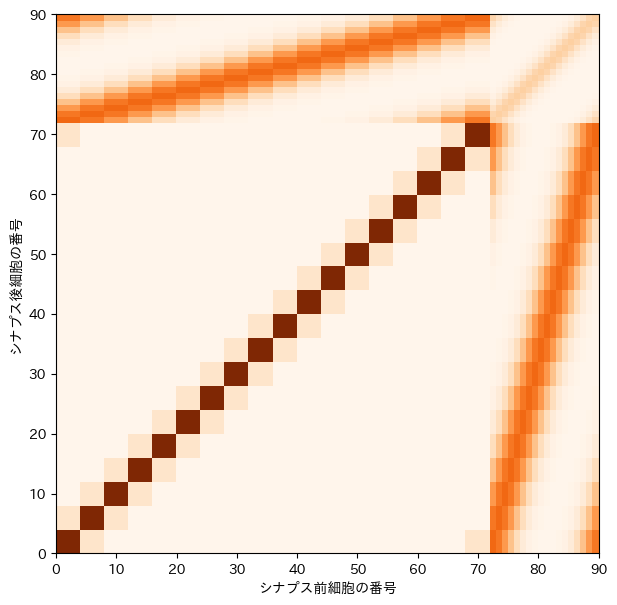

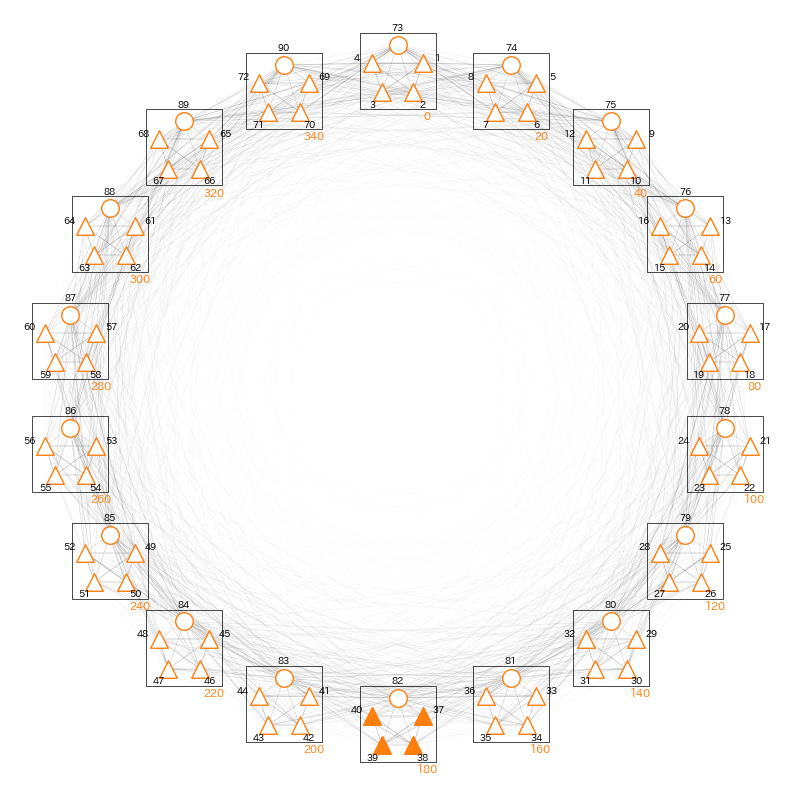

In [14]:
#@title ネットワークのアーキテクチャ

# アーキテクチャの設定を作成
architecture = bms.generate_network_architecture(num_unit=90)

# 設定値を確認
print(
    '神経細胞の総数:', architecture['num_unit'],
    '\n興奮性神経細胞の総数:', architecture['num_unit_exc'],
    '\n抑制性神経細胞の総数:', architecture['num_unit_inh'],
    '\n\n神経細胞の位置（角度）:\n', architecture['positions'],
    '\n\nキュー電流を与える神経細胞:\n', architecture['positions_cue'],
    '\n\n興奮性細胞:\n', architecture['set_exc'],
    '\n\n抑制性細胞:\n', architecture['set_inh'],
    '\n\n重みづけ係数:\n', architecture['weights'],
)

# 結合強度を可視化
vis.plot_weight(architecture=architecture)

# 神経回路のアーキテクチャを可視化
vis.plot_network(
    architecture=architecture,
    display_circle=False,  # 円周を可視化するかどうか
    display_weight=True,  # 結合強度を可視化するかどうか
    display_index=True,  # 神経細胞の番号を可視化するかどうか
)

## 仮想障害シミュレーション


In [ ]:
#@title ワーキングメモリのシミュレーションを実行する

# 評価時間を定める
t_eval = bms.generate_t_eval(t_max=700)

# 実行
results = bms.simulate_working_memory(
    t_eval=t_eval,
    architecture=architecture,
    dysfuncs_ampa=1.0,
    dysfuncs_nmda=1.0,
    dysfuncs_gaba=1.0,
)

# 膜電位をプロット
vis.plot_potentials(
    t_eval=t_eval,
    potentials=results['potentials'][:, 39:41],
)

# ラスタグラムを表示
vis.plot_raster(
    spikes=results['spikes'][:, architecture['set_exc']],  # 興奮性細胞のみ抽出
    t_eval=t_eval,
    time_span=(100, 200),  # 100, 200ミリ秒に縦線を表示する
)

In [ ]:
#@title GABA受容体の機能低下

# 評価時間を定める
t_eval = bms.generate_t_eval(t_max=700)

# 実行
results = bms.simulate_working_memory(
    t_eval=t_eval,
    architecture=architecture,
    dysfuncs_ampa=1.0,
    dysfuncs_nmda=1.0,
    dysfuncs_gaba=0.4,
)

# ラスタグラム
vis.plot_raster(
    spikes=results['spikes'][:, architecture['set_exc']],
    t_eval=t_eval,
    time_span=(100, 200),
)

In [ ]:
#@title GABA受容体の機能亢進

# 評価時間を定める
t_eval = bms.generate_t_eval(t_max=700)

# 実行
results = bms.simulate_working_memory(
    t_eval=t_eval,
    architecture=architecture,
    dysfuncs_ampa=1.0,
    dysfuncs_nmda=1.0,
    dysfuncs_gaba=1.3,
)

# ラスタグラム
vis.plot_raster(
    spikes=results['spikes'][:, architecture['set_exc']],
    t_eval=t_eval,
    time_span=(100, 200),
)

In [ ]:
#@title AMPA受容体の機能低下

# 評価時間を定める
t_eval = bms.generate_t_eval(t_max=700)

# 実行
results = bms.simulate_working_memory(
    t_eval=t_eval,
    architecture=architecture,
    dysfuncs_ampa=0.2,
    dysfuncs_nmda=1.0,
    dysfuncs_gaba=1.0,
)

# ラスタグラム
vis.plot_raster(
    spikes=results['spikes'][:, architecture['set_exc']],
    t_eval=t_eval,
    time_span=(100, 200),
)

In [ ]:
#@title さまざまな値もやってみよう！

# 評価時間を定める
t_eval = bms.generate_t_eval(t_max=700)

# 設定値を定める
dysfuncs_list = [
    # AMPA, NMDA, GABAの順番
    [1.0, 1.0, 1.0],  # 通常
    [1.0, 0.7, 1.0],  # NMDA低下
    [1.0, 0.4, 1.0],  # NMDA低下
    [1.0, 1.0, 0.4],  # GABA低下
    [1.0, 1.0, 1.3],  # GABA亢進
    [0.2, 1.0, 1.0],  # AMPA低下
]

for dysfuncs in dysfuncs_list:
    # 実行
    results = bms.simulate_working_memory(
        t_eval=t_eval,
        architecture=architecture,
        dysfuncs_ampa=dysfuncs[0],
        dysfuncs_nmda=dysfuncs[1],
        dysfuncs_gaba=dysfuncs[2],
    )

    # ラスタグラム
    vis.plot_raster(
        spikes=results['spikes'][:, architecture['set_exc']],
        t_eval=t_eval,
        time_span=(100, 200),
        title='ワーキングメモリ課題（AMPA: {}, NMDA: {}, GABA: {}）'.format(
            dysfuncs[0], dysfuncs[1], dysfuncs[2],
        ),
    )

# 補足：ライブラリの読み込み

補足資料では追加でライブラリを読み込むため，以下を実行してください

In [ ]:
# 行列演算用ライブラリを読み込む
import numpy as np

# 可視化用ライブラリを読み込む
import matplotlib.pyplot as plt

# 補足：神経細胞と電気回路

ここでは，膜電位の微分方程式の根拠となる「等価回路モデル」を説明し，生物物理学的モデルの理論的根拠を補強します。「等価回路モデル」とは，神経細胞の電気活動に対応する電気回路のことです。等価回路モデルでは，膜電位を電圧，イオンの流れを電流，イオンチャネルを抵抗（あるいは，抵抗の逆数のコンダクタンス）と対応づけ，神経細胞の複雑な振る舞いをモデル化します。


| **電気回路** | **神経細胞** | **記号**|
|----------------|---------------------|--------|
| 電圧 | 膜電位（起電力） | $V(E)$ |
| 電流 |   イオンの流れ      | $I$ |
| キャパシタンス（静電容量）| 細胞膜 | $C$ |
| 電荷 |  イオン| $Q$ |
| コンダクタンス（抵抗） | イオンチャネル | $g(=\frac{1}{R})$ |

おさらいをすると，神経細胞における電気活動の背後には，ナトリウムイオンやカリウムイオンといったイオンの移動があります。イオンを通さない細胞膜の表面にはプラスイオンやマイナスイオンが互いに引き寄せられてたまり，神経細胞内外の電位差が生じます。この電位差が膜電位でした。一方，イオンの通り道であるイオンチャネルが開閉した場合には，神経細胞内外のイオンの濃度が変化することで膜電位に変化が生じます。

このような神経細胞における，イオンの移動や膜電位といった電気活動は，図[S3-1](#fig:biophysic:conductance:scheme)に示すような電気回路と見做すことができます。図[S3-1](#fig:biophysic:conductance:scheme)では，本書で扱った積分発火モデルを想定し，仮想的にイオンチャネルが一つしか持たないとしています。


<figure id="fig:biophysic:conductance:scheme">
<div class="center">
<img src="https://github.com/CPcolloquium/cp_programming_book/raw/main/3_Biophysical-model/img/biophysic-conductance-scheme.png?raw=true"
width=800 />
</div>
<figcaption> 図S3-1. 等価回路モデルの概念図（国里ら(2019)より引用） </figcaption>
</figure>

図[S3-1](#fig:biophysic:conductance:scheme)で示される等価回路モデルを，より抽象的に電気回路として表現したものが（図[S3-2](#fig:biophysic:circuit:example)）です。

<figure id="fig:biophysic:circuit:example">
<div class="center">
<img src="https://github.com/CPcolloquium/cp_programming_book/raw/main/3_Biophysical-model/img/biophysic-circuit-example.png?raw=true"
width=500 />
</div>
<figcaption> 図S3-2. 積分発火モデルにおける等価回路モデル </figcaption>
</figure>

まずは，図[S3-2](#fig:biophysic:circuit:example)の左側に注目します。細胞膜がイオン電荷を貯め込む性質は，電気回路におけるコンデンサと呼ばれるものに相当します。また，細胞膜に貯まった電荷が生み出す電位差が，膜電位$V_\mathrm{m}$に相当します。細胞膜（コンデンサ）に貯まった電荷量を$Q_\mathrm{m}$としましょう。一般に，電荷量$Q$は，電位$V$に比例する性質があります。

$$\begin{aligned}
Q = CV
\end{aligned}$$

これは，例えば，貯まるイオン電荷の量$Q$が多いと電位差$V$が大きくなることを示します。また，$C_\mathrm{m}$が大きい細胞膜の場合には，膜電位$V_\mathrm{m}$が同じでも，細胞膜にたまるイオンの電荷量$Q_\mathrm{m}$が多くなるとも理解できます。ここで，電荷$Q$や電位$V$は時間に依存して変化する量ですので，時間微分をとると，

$$\begin{aligned}
  \frac{dQ_\mathrm{m}}{dt} = C_\mathrm{m} \frac{dV_\mathrm{m}}{dt}
\end{aligned}$$

になります。ここで，電流は電荷の時間変化であるため，$I = \frac{dQ}{dt}$になることに注意してください。その結果，細胞膜に向かい移動する電流$I_\mathrm{m}$は，

$$\begin{aligned}
  I_\mathrm{m} = C_\mathrm{m} \frac{dV_\mathrm{m}}{dt}
\end{aligned}$$

となります。この式は，積分発火モデルにおける膜電位$v(t)$の微分方程式です（本文式(3-1)の第一式に対応）。



次に，$I_\mathrm{m}$の動態を考察するために，図[S3-2](#fig:biophysic:circuit:example)の右側に存在する抵抗と電池に視点を移してみましょう。起電力（$E_{\mathrm{Rest}}$）は，神経細胞内外のイオン濃度差を解消しようとしてイオンが移動しようとする駆動力と移動後のイオン電荷の内外の差による駆動力のつりあいから導出される電位（平衡電位）です。内部抵抗（$R$）は，イオンがイオンチャネルを通るときの通りにくさを表わします。図[S3-2](#fig:biophysic:circuit:example)が構成する電気回路において，キルヒホッフの第二法則とオームの法則から，$V_{\mathrm{m}} = I_{\mathrm{Rest}} R_{\mathrm{Rest}} + E_{\mathrm{Rest}}$であり，この式を変形すると，

$$\begin{aligned}
  I_{\mathrm{Rest}} = \frac{1}{R_{\mathrm{Rest}}} ( V_{\mathrm{m}} - E_{\mathrm{Rest}})
\end{aligned}$$

と表現できます。一方，キルヒホッフの第一法則から，

$$\begin{aligned}
  I_{\mathrm{Ext}} = I_{\mathrm{m}} + I_{\mathrm{Rest}}
\end{aligned}$$

となります。両者の式を代入し移項を行うと

$$\begin{aligned}
  I_{\mathrm{m}} = - \frac{1}{R_{\mathrm{Rest}}} ( V_{\mathrm{m}} - E_{\mathrm{Rest}}) + I_{\mathrm{Ext}}
\end{aligned}$$

となります。結局，先ほど確認をした$I_\mathrm{m} = C_\mathrm{m} \frac{dV_\mathrm{m}}{dt}$を代入すると，積分発火モデルと同じ

$$\begin{aligned}
  C_\mathrm{m} \frac{dV_\mathrm{m}}{dt} = - \frac{1}{R_{\mathrm{Rest}}} ( V_{\mathrm{m}} - E_{\mathrm{Rest}}) + I_{\mathrm{Ext}}
\end{aligned}$$

が得られます。生物物理学や電気生理学では，イオンチャネルでのイオンの通りやすさを指標とすることが多いです。そこで，抵抗$R_{\mathrm{Rest}}$ではなくイオンの通りやすさを表すコンダクタンス（$g_{\mathrm{Rest}} = \frac{1}{R_{\mathrm{Rest}}}$）に置き換えると，本章式(3-1)の第一式と類型になります。

$$\begin{aligned}
  C_\mathrm{m} \frac{dV_\mathrm{m}}{dt} = - \frac{1}{g_{\mathrm{Rest}}} ( V_{\mathrm{m}} - E_{\mathrm{Rest}}) + I_{\mathrm{Ext}}
\end{aligned}$$

これらの式変形が，生物物理学的モデルの根幹をなす等価回路モデルの発想です。

本書では，上記のような単一のイオンチャネルが存在する神経細胞以上に複雑なモデルを扱います。しかし，等価回路モデルの発想自体は本章にわたり共通します。

具体的に，「イオンチャネルのモデル」では，イオンチャネルの機能を定式化したコンダクタンスが定数ではなくダイナミックに変化する事例を考察します。「ワーキングメモリモデル」では，一つの神経細胞に複数のイオンチャネルが存在するモデルを考察します。このような場合には，図[S3-2](#fig:biophysic:circuit:example)の右側に存在する抵抗と電池の経路が，イオンチャネルの数だけ並列に増加することになります。


# 補足：微分方程式の汎用数値計算関数

## 基本的な考え方

関数`solve_differential_equation()`の実装の内部について解説を行います。具体的な実装は`BiophysicalModelSimulator.py`ファイルを確認ください。

まずは，オイラー法を用いた数値シミュレーションの復習から始めましょう。数値シミュレーションの目標は，時間発展する$y(t)$の時系列を求めることです。オイラー法を利用することで，微分方程式$f(t, y)=\frac{dy(t)}{dt}$が与えられた際，更新式$y(t + \Delta t) \sim y(t) + \Delta t \frac{dy(t)}{dt}$を導出できるのでした。そして，導出された更新式を利用することで，現在の状態$y(t)$から次の時刻における状態$y(t + \Delta t)$が計算できます。これを全ての時刻に渡り繰り返すことで，状態$y(t)$の時系列データが得られ，数値シミュレーションが完成します。

このような手続きからも分かるように，オイラー法は抽象化された汎用性の高い手続きです。この抽象性と汎用性を保ったままオイラー法をプログラミングし，微分方程式の内容が変更された場合でも適用可能なようにしましょう。そのために，微分方程式$\frac{dy(t)}{dt}$を引数として受け取って，$y(t + \Delta t)$を返す関数を考えます。この際，次の時刻$t + \Delta t$における状態$y(t + \Delta t)$を計算するためには，微分方程式$\frac{dy(t)}{dt} = f(t, y)$に加えて，時刻$t$と，現時刻$t$における状態$y(t)$が必要になるのでした。結果，実装するオイラー法のコードはおおよそ以下のようになるはずです。

```python
def solve_differential_equation_example(dydt, t, y, delta_t):
    y_next = y + delta_t * dydt(t, y)
    return y_next
```

この`solve_differential_equation_example()`関数は，ある時刻$t$における状態$y(t)$の更新のみを行います。そのため，時間軸に沿って繰り返し適用することで，状態$y(t)$の全時刻にわたる系列データを作成できます。


## 補足事項

`solve_differential_equation_example()`関数について，いくつか補足があります。

第一に，引数`dydt`は関数となることに注意してください。関数の引数の多くは値であるため，あまり見慣れないかもしれません。Pythonでは，括弧を外して関数名を呼び出すと，その関数を他の関数の引数にすることができます。あらかじめ関数として定義した具体的な微分方程式を，`dydt`という名前の変数に格納し抽象化することで，汎用的な関数が設計できます（この考え方が難しい方も多いと思いますが，本文やプログラムなどの具体例を確認すると理解しやすくなると思われます）。

第二に，`solve_differential_equation_example()`関数とは異なり，実際の`solve_differential_equation()`は，`dydt`, `t`, `y`, `delta_t`以外の引数も受け取れるように拡張しています。

例えば，積分発火モデルの微分方程式の場合には，`t`や`potential`以外にも，直近の発火時刻`last_spike`を引数に利用していました。このような処理に対応できるようにするため，`solve_differential_equation()`を経由して，微分方程式`dydt()`に付加的な引数を与えられるように修正を施しています。実際のプログラムでは，事前に宣言されていない名前の引数を受け取ることが可能な可変長キーワード引数`**kwargs`を利用しています。具体的な処理の流れとして，`solve_differential_equation()`が，可変長キーワード引数`**kwargs`を用いて付加的な引数を受け取った後，`solve_differential_equation()`内部で，可変長キーワード引数`**kwargs`を用いて微分方程式`dydt()`に付加的な引数をそのまま渡すようになっています。

第三に，オイラー法の場合には，時点間における状態の変動が大きい微分方程式の数値計算では誤差（本文図3-11の青い点線）が大きくなるため，ルンゲ・クッタ法と呼ばれる精密な計算手法が必要になる場合があります。そこで，`solve_differential_equation()`では，オイラー法だけでなくルンゲ・クッタ法も使用できるように拡張しました。`solve_differential_equation()`の引数`method`に，ルンゲ・クッタ法の場合は`'rk4'`を，オイラー法の場合は`'euler'`を指定します。ワーキングメモリモデルのシミュレーションでは，ルンゲ・クッタ法を利用しています。

このように`solve_differential_equation()`を実装することで，数値計算の詳細を隠蔽し，効率的なプログラミングが行えます。

なお，`solve_differential_equation()`関数のような微分方程式の数値計算ツールは，各種プログラミング言語でも用意されています。Pythonの場合，Scipyパッケージの`scipy.integrate.solve_ivp`が利用できます。

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html


# 補足：数値計算の誤差

数値計算法や時間幅に依存した誤差について分析してみましょう。

厳密計算の可能な微分方程式に対して，さまざまな数値計算法や時間幅でシミュレーションを行い，厳密解と近似解とのズレを可視化してみます。

`compare_solver()`関数は，引数に指定した数値計算法や時間幅のシミュレーションを網羅的に行います。

## 指数関数の計算の場合

まずは，指数的に減衰する挙動を比較してみます。計算式は以下のようになります。

微分方程式の場合：

$$
\tau \frac{dx(t)}{dt} = - x
$$

厳密解の場合：

$$
x(t) = \exp{(- \frac{1}{\tau} t + C)}
$$

ここでCは積分定数。$x(t)$の初期値を$10$とすると，$t=0$かつ$x(0)=10$なので

$$
C = \log{x(t)} + \frac{1}{\tau} t = \log{10}
$$

となるので，結局，

$$
x(t) = 10\exp{(-t)}
$$

In [ ]:
results = bms.compare_solver(
    equation_type='exponential',
    t_max=5,
    method_list=['euler', 'rk4'],
    delta_t_list=[0.1, 0.01, 0.001],
)

In [ ]:
# 近似計算のプロット
for method in results['settings']['method']:
    for delta_t in results['settings']['delta_t']:
        rslt = results['original'][method][str(delta_t)]
        plt.plot(rslt['t_eval'], rslt['y'][:, 0], linewidth=0.5, alpha=0.8, label=method + ' / ' + str(delta_t))

# 厳密解のプロット
rslt = results['exact'][str(min(results['settings']['delta_t']))]
plt.plot(rslt['t_eval'], rslt['y'][:, 0], linewidth=1, alpha=0.8, label='exact')
plt.legend()
plt.show()

時間幅が0.1の時のオイラー法をのぞいて，プロットが重なっていることがわかります。そのため，おおよそうまく計算ができていることがわかります。

## 円軌道の計算の場合

次は，半径が1である円軌道を計算してみましょう。

$(u, v)$をそれぞれx, y座標として以下のように計算できます。

微分方程式の場合：

$$
\frac{du}{dt} = -v \\
\frac{dv}{dt} = u
$$

厳密解の場合：

$$
(u, v) = (\cos(t), \sin(t))
$$

In [ ]:
results = bms.compare_solver(
    equation_type='circle',
    t_max=100,
    method_list=['euler', 'rk4'],
    delta_t_list=[0.1, 0.01, 0.001],
)

まずは，時間に依存したx座標の変化を抽出してプロットします。

In [ ]:
# 近似計算のプロット
for method in results['settings']['method']:
    for delta_t in results['settings']['delta_t']:
        rslt = results['original'][method][str(delta_t)]
        plt.plot(rslt['t_eval'], rslt['y'][:, 0], linewidth=0.5, alpha=0.8, label=method + ' / ' + str(delta_t))

# 厳密解のプロット
rslt = results['exact'][str(min(results['settings']['delta_t']))]
plt.plot(rslt['t_eval'], rslt['y'][:, 0], linewidth=1, alpha=0.8, label='exact')
plt.legend()
plt.show()

時間幅が0.1のオイラー法の場合，時間が経過するにつれて計算がずれ，値が発散してしまうことがわかります。

時間幅が0.1のオイラー法をのぞいて，x座標の時間変化をプロットしてみましょう。

In [ ]:
# 近似計算のプロット
for method in results['settings']['method']:
    for delta_t in results['settings']['delta_t']:
        rslt = results['original'][method][str(delta_t)]
        # 時間幅が0.1のオイラー法を除外してプロット
        if not (method == 'euler' and delta_t == 0.1):
            plt.plot(rslt['t_eval'], rslt['y'][:, 0], linewidth=0.5, alpha=0.8, label=method + ' / ' + str(delta_t))

# 厳密解のプロット
rslt = results['exact'][str(min(results['settings']['delta_t']))]
plt.plot(rslt['t_eval'], rslt['y'][:, 0], linewidth=1, alpha=0.8, label='exact')
plt.legend()
plt.show()

時間幅が0.01や0.001であってもオイラー法は計算がズレるようです。

この結果をxy平面にも表示してみましょう

In [ ]:
# オイラー法のプロット
method = 'euler'
for delta_t in results['settings']['delta_t']:
    rslt = results['original'][method][str(delta_t)]
    plt.plot(rslt['y'][:, 0], rslt['y'][:, 1], linewidth=0.5, alpha=0.8, label=method + ' / ' + str(delta_t))
rslt = results['exact'][str(min(results['settings']['delta_t']))]
plt.plot(rslt['y'][:, 0], rslt['y'][:, 1], linewidth=1, alpha=0.8, label='exact')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('オイラー法')
plt.legend()
plt.show()

# ルンゲ・クッタ法のプロット
method = 'rk4'
for delta_t in results['settings']['delta_t']:
    rslt = results['original'][method][str(delta_t)]
    plt.plot(rslt['y'][:, 0], rslt['y'][:, 1], linewidth=0.5, alpha=0.8, label=method + ' / ' + str(delta_t))
rslt = results['exact'][str(min(results['settings']['delta_t']))]
plt.plot(rslt['y'][:, 0], rslt['y'][:, 1], linewidth=1, alpha=0.8, label='exact')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('ルンゲ・クッタ法')
plt.legend()
plt.show()

時間幅が0.1や0.01のオイラー法は放射状に広がってゆくことがわかります。

In [ ]:
# SciPy solverとの比較
result = bms.validate_solver()

# 補足：行列の演算

本章の生物物理学的モデルや次章ニューラルネットワークモデルでは，行列の掛け算を利用しますが，行列の掛け算にはいくつかの種類があり，この計算方法を誤ると間違った結果や解釈に至ります。そのため，本コラムでは，行列の掛け算の種類と実装について，簡単に解説をします。

**行列積**は，一般的な行列の掛け算になります。

行列$A$と$B$の行列積$AB$の要素$(AB)_{ij}$は，それぞれ$\sum_{k=1}^ma_{ik}b_{kj}$になります。つまり，行列$A$の行ベクトルと行列$B$の列ベクトルとの内積を網羅的に計算し，それを並べたものになります。もし$A$が$n \times m$行列で，$B$が$m \times p$行列の場合，その結果は$n \times p$行列になります。ここで，$A$の列数と$B$の行数が一致していなければ計算できないことに注意してください。Numpyでは`np.matmul()`，PyTorchでは`torch.mm()`などを使って演算ができます。

In [ ]:
# 行列積の計算例
x = np.array(
    [[1, 2],
     [3, 4],
     [5, 6]])
y = np.array(
    [[-1, -2, -3],
     [-4, -5, -6]])
print(np.matmul(x, y))

**アダマール積**では，同じ位置にある要素をかけあわせたものであり，要素積とも呼ばれます。より抽象的には，行列$A$と$B$のアダマール積$A \bigodot B$は$(a_{ij}b_{ij})$となります。同じサイズの行列同士にしか適用できず，計算結果は，元の行列と同じサイズになります。NumpyやPyTorchの場合，アスタリスク（`*`）演算子を用いた場合に適用される行列演算は，アダマール積です。


In [ ]:
# アダマール積の計算例
x = np.array(
    [[1, 2],
     [3, 4]])
y = np.array(
    [[-1, -2],
     [-3, -4]])
print(x * y)

In [ ]:
# アスタリスク演算子は配列ではなく行列で宣言するとアダマール積ではなく行列積になる
x = np.matrix(
    [[1, 2],
     [3, 4]])
y = np.matrix(
    [[-1, -2],
     [-3, -4]])
print(
    'type:\n', type(x),
    '\n\nasterisk:\n', x * y,
    '\n\nmatmul:\n', np.matmul(x, y),
)

NumpyやPyTorchを利用する場合には，意図した種類の演算が正しく適用されたかどうか注意する必要があります。また，行列（配列やテンソルを含む）を扱う上で次元を間違えると誤った計算結果になります。データの形状がどのような形なのか，データにはそれぞれの次元にどのような順序で何が保存されているのかなど，常に確認をするようにしましょう。


# 補足：積分発火モデルを用いた神経回路の設計

（※ 本セクションは，難易度として「膜電位とスパイクのモデル」の後，「イオンチャネルのモデル」の前に位置付けられると想定して，執筆しました。ただし，実装編では`solve_differential_equation()`関数を利用しているため，予め「微分方程式の数値計算用関数」に目を通しておく必要があります。）

## シミュレーションをしてみよう！

実際の神経系は単一の神経細胞ではなく複数の神経細胞が回路を構成しています。ここでは，複数個の積分発火モデルを組み合わせ神経細胞のネットワークを構築し，ある神経細胞が他の神経細胞に影響を与える様子をシミュレーションしましょう。

今回用意したシミュレーション用関数`simulate_network()`は，積分発火モデルによって記述される三つの神経細胞が相互に接続した神経回路において，神経細胞の膜電位の変化をシミュレーションします（図[S3-3](#fig:biophysic:lif:network:architecture)）。この`simulate_network()`関数では，重みづけ係数`weight`を引数で渡すようにしています。この仕組みのおかげで，異なる重みづけ係数を与えた場合に，どのような振る舞いをするのか確認できます。

なお，「実装編」にて詳述するように，図[S3-3](#fig:biophysic:lif:network:architecture)では重みづけ係数$w$はそれぞれ区別された下付き添字を使っていますが，このシミュレーションではすべて同じ値としています。

<figure id="fig:biophysic:lif:network:architecture">
<div class="center">
<img src="https://github.com/CPcolloquium/cp_programming_book/raw/main/3_Biophysical-model/img/biophysic-lif-network-architecture.png?raw=true"
width=500 />
</div>
<figcaption> 図S3-3. 積分発火モデルを用いた神経回路の概念図 </figcaption>
</figure>

試しに`weight`の値が0の場合（神経結合がない場合）と20の場合（神経結合がある場合）を実行しプロットしてみましょう。



In [ ]:
# 評価時間を定める
t_eval = bms.generate_t_eval(t_max=100)

# 重みづけ係数の設定値
weight_list = [0, 20]

for weight in weight_list:
    # 実行
    results = bms.simulate_network(
        t_eval=t_eval,
        weight=weight,
    )

    # 可視化
    vis.plot_potentials(
        t_eval=t_eval,
        potentials=results['potentials'],
        title='weight={}'.format(weight),
    )

二つのフィギュアを比較してみると，`weight=20`の場合には，一つの神経細胞が発火した後にその他の神経細胞が連続して（同期して）発火することがわかります。これは，ひとつの神経細胞が発火した直後に，シナプスを通じて，他の細胞への入力電流が大きくなるためだと考えられます。このように，複数の神経細胞を接続することで，神経細胞間の相互作用が可能となり，複雑な情報処理ができると考えられています。

## 理論編

膜電位の更新は，前節の積分発火モデルと同じものとします。ただし，神経細胞が複数登場するため，それぞれの細胞に対して，膜電位$v_i(t)$や外部電流$I_{\mathrm{Ext}, i}(t)$を考察する必要があります。ここで下付きの添字$i$は神経細胞の番号を示します。

外部電流$I_{\mathrm{Ext}, i}(t)$には，他の神経細胞からの入力電流$I_{\mathrm{Syn}, i}(t)$と，その他の流入電流$I_{\mathrm{Cue}, i}(t)$（例えば，生理学的な実験において実験者によって注入された電流やモデルで考慮していない他の神経細胞からの流入電流が考えられます）があると仮定し，電流の式を以下に置き換えます。

$$\begin{aligned}
  I_{\mathrm{Ext}, i}(t) = I_{\mathrm{Syn}, i}(t) + I_{\mathrm{Cue}, i}(t)
\end{aligned}$$

今回は，複数の神経細胞の集合が相互に結合した回路を想定しています（図[S3-3](#fig:biophysic:lif:network:architecture)）。そのため，他の神経細胞からの入力電流$I_{\mathrm{Syn}, i}(t)$は，他の神経細胞のスパイク$S_j(t - \Delta t)$に重みづけ係数$w_{ij}$を乗じたものを足したものだと仮定します。

$$\begin{aligned}
  I_{\mathrm{Syn}, i}(t) = \sum_{j \in J_i} w_{ij} S_j (t - \Delta t)
\end{aligned}$$

ここで$J_i$は，$i$番目の神経細胞が結合している神経細胞の番号を示す添字を要素とする集合とします。$w_{ij}$は，$j$番目の神経細胞から$i$番目の神経細胞への重みづけ係数です。$S_j(t - \Delta t)$は，時刻$t - \Delta t$において$j$番目の神経細胞が発火した場合に$1$,
発火しなかった場合に$0$とします。ここで，時刻として$t$ではなく$t-\Delta t$を用いているのは，離散時間で1つ前の時刻に発火したかどうかを判定しているためです。


## 実装編

今回の実装では，神経細胞の個数は3と固定し，それぞれの神経細胞は，自身を含めた他の神経細胞すべてと結合していると想定します（図[12](#fig:biophysic:lif:network:architecture)）。そのため，$i$は$\{1, 2, 3\}$のうちのいずれかであり，いずれの$i$の場合でも$J_i$は$\{1, 2, 3\}$となります。

本セクションでは，全時刻にわたりシミュレーションを行う`simulate_network()`関数と微分方程式用の関数`differentiate_network()`を実装します（表[3](#tbl:biophysic:network)）。


| **関数名** |      **用途**      |
|----------------|---------------------------|
|`differentiate_network()`| 膜電位の微分方程式 |
|`simulate_network()`| 積分発火モデルを用いた神経回路のシミュレーションを行う|


`simulate_network()`関数は以下のようになります。

```
def simulate_network(t_eval,
                      weight):
    # [A] シミュレーションの設定
    np.random.seed(SEED)  # シードを固定し実行ごとの乱数を統一する

    # 注入電流の大きさ
    cue_scale = 20
    # 神経細胞数は3で固定
    num_unit = 3
    # 重みづけ係数は，値がweightのnum_unit x num_unitの行列とする
    weights = weight * np.ones((num_unit, num_unit))

    # [B] 初期値の設定
    potentials = V_INIT * np.ones((num_unit, 1))
    spikes = np.zeros((num_unit, 1))
    last_spikes = -100 * np.ones((num_unit, 1))

    # [C] 結果保存用変数の準備
    results = {
        'potentials': [],
        'spikes': [],
    }

    for t in t_eval:
        # [D] 計算結果を保存
        results['potentials'].append(potentials)
        results['spikes'].append(spikes)

        # [E] 各時刻における計算
        # [E-a] 微分方程式による更新
        potentials = solve_differential_equation(
            dydt=differentiate_network,
            t=t,
            y=potentials,
            delta_t=DELTA_T,
            method='euler',
            spikes=spikes,
            weights=weights,
            cue_scale=cue_scale,
        )

        # [E-b] 積分発火モデルによる更新
        refractory = (last_spikes < t) & (t <= last_spikes + T_REF)
        active = (potentials >= V_THERESHOLD) & (~ refractory)
        potentials[active] = V_ACT
        potentials[refractory] = V_RESET

        # [E-c] スパイクの判定
        spikes = np.where(potentials == V_ACT, 1, 0)

        # [E-d] 直近の発火時刻の更新
        last_spikes = np.where(
            spikes == 1, t, last_spikes
        )

    # [F] 返り値の準備
    for key, value in results.items():
        # 結果の値をNumpy型に整形
        results[key] = np.hstack(value).T

    return results

```

コード自体は長いものの，大まかな手続きは通常の積分発火モデルをベースにしています。ただし，今回の実装では，スカラ値ではなくベクトルや行列を利用している点に注意が必要です。実装の解説も，通常の積分発火モデルとの相違点を中心に説明します。

まず「\[A\] シミュレーションの設定」では，重みづけ係数$w_ij$を宣言しています。この際，個別の重みづけ係数$w_ij$を束ね，<シナプス後細胞の数$\times$シナプス前細胞の数>のサイズを持つ行列（正確には`np.ndarray`）として`weights`を宣言しています。なお，実際の神経細胞間の結合強度はペアにより異なると考えられますが，今回の実装では単純化のため全て同じ結合強度にしています。

「\[B\] 初期値の設定」でも，スカラではなく行列として，膜電位`potentials`やスパイク発火`spikes`，直近の発火時刻`last_spikes`を初期化しています。この時の具体的なサイズは，すべて<神経細胞の数$\times$1>です。

「\[E\] 各時刻における計算」では，具体的に，

-   \[E-a\] 微分方程式による更新
-   \[E-b\] 積分発火モデルによる更新
-   \[E-c\] スパイクの判定
-   \[E-d\] 直近の発火時刻の更新

という手順を踏んでいます。

「\[E-a\] 微分方程式による更新」では，`solve_differential_equation()`を使います。実際の微分方程式の計算は，後に説明する`differentiate_network（）`が担います。，膜電位の微分に計算となる`spikes`, `weights`, `cue_scale`を付加的な引数として渡しています。

「\[E-b\] 積分発火モデルによる更新」，「\[E-c\] スパイクの判定」，「\[E-d\] 直近の発火時刻の更新」は，処理の意図自体は積分発火モデルと同じで，不応期の場合には`V_RESET`に膜電位を固定したり，発火の場合には`V_ACT`に固定したりしています。

しかし，行列（例えば`potentials`）の要素それぞれに対して，条件分岐を行う必要があるあため，`if`文ではなく`np.where()`を利用しています。`np.where`は，第一引数の行列の要素が真の場合は第二引数，偽の場合は第三引数を要素とする行列を返します。

`differentiate_network()`関数は以下のようになります。

```
def differentiate_network(t, y, **kwargs):
    weights = kwargs['weights']
    spikes = kwargs['spikes']
    cue_scale = kwargs['cue_scale']

    # [E-a-i] 注入電流
    # 今回は簡便に微分方程式内部でノイズを発生
    currents_cue = cue_scale * np.random.rand(*y.shape)

    # [E-a-ii] シナプスからの流入電流
    currents_syn = np.matmul(weights, spikes)

    # [E-a-iii] 神経細胞全体の流入電流
    currents_ext = currents_cue + currents_syn

    # [E-a-iv] 微分方程式の計算
    dydt = - G_MAX_LEAK_NETWORK * (y - E_LEAK_NETWORK) + currents_ext
    return dydt
```

この`differentiate_network()`関数は，神経細胞の膜電位の微分を返す関数です。

具体的な手続きは，

- [E-a-i] 注入電流
- [E-a-ii] シナプスからの流入電流
- [E-a-iii] 神経細胞全体の流入電流
- [E-a-iv] 微分方程式の計算

となります。微分の計算において，本質的な箇所は「[E-a-iv] 微分方程式の計算」であり，積分発火モデルの関数`calc_lif()`とほぼ同じです。

しかし，電流の数式に従って，流入電流`currents_ext`の計算を置き換える必要があります。具体的には，`currents_ext`は`currents_cue`と`currents_syn`との和になるのでした。

今回はそれぞれの神経細胞が異なる振る舞いをするように，注入電流`currents_cue`は0から20までの値からランダムにサンプリングされると想定しています。乱数の取り扱いは難しいですが，今回は簡便に`np.random.rand()`を用いて0から1の値をランダムに取得し，それに`cue_scale`を乗じて，注入電流を作成しています（ただし，シミュレーションを繰り返しても，結果が同じになるように`simulate_network()`関数の\[A\]で乱数のシードを固定しています）。

シナプスを経由して流入する電流`current_syn`の値は，前時刻における各々の神経細胞の発火に基づいて決まります。ここで，`weights`と`spikes`との行列積をとります。このように行列の演算を活用することで，神経回路の計算が楽に行えます。

数式に書き起こすと以下のような計算に相当します。

$$\begin{aligned}
  \begin{pmatrix}
    I_{\mathrm{syn}, 1} \\
    I_{\mathrm{syn}, 2} \\
    I_{\mathrm{syn}, 3}
  \end{pmatrix}
  &=
      \begin{pmatrix}
        w_{11} & w_{12} & w_{13} \\
        w_{21} & w_{22} & w_{23} \\
        w_{31} & w_{32} & w_{33}
      \end{pmatrix}
      \begin{pmatrix}
        S_1 \\
        S_2 \\
        S_3
      \end{pmatrix} \\
         &=
             \begin{pmatrix}
               w_{11} S_1 + w_{12} S_2 + w_{13} S_3 \\
               w_{21} S_2 + w_{22} S_2 + w_{23} S_3 \\
               w_{31} S_2 + w_{32} S_2 + w_{33} S_3
             \end{pmatrix}
\end{aligned}$$

# 補足：その他資料

In [ ]:
#@title マグネシウムブロックの可視化
potential = np.linspace(-100, 100, 10000)
plt.plot(potential, bms.calc_block_mg(potential))
plt.xlabel('膜電位 [mV]')
plt.ylabel('マグネシウムゲート')
plt.show()

In [ ]:
#@title 距離から結合強度を計算する関数を可視化
dist_eval = np.linspace(0, 360, 1000)
plt.plot(dist_eval, bms.calc_exp(dist_eval, strength=0.5, width=60))
plt.xlabel('シナプス前細胞と後細胞との距離 [度]')
plt.ylabel('重み付け係数')
plt.show()

# コラム：ホジキン・ハックスリーモデル

数式は山﨑・五十嵐（2021）を参考にしました。

ホジキン・ハックスリーモデルは，非常に精巧ですが，計算コストは大きいです。時間幅$\Delta t$を大きくしてしまうと精度が落ち数字が発散してしまいうまく動作しません。シミュレーション時には注意してください。

In [ ]:
#@title 補助関数の可視化
v_eval = np.linspace(-70, 40, 1000)

plt.plot(v_eval, bms.calc_alpha_m(v_eval), label='alpha_m')
plt.plot(v_eval, bms.calc_beta_m(v_eval), label='beta_m')
plt.legend()
plt.show()

plt.plot(v_eval, bms.calc_alpha_h(v_eval), label='alpha_h')
plt.plot(v_eval, bms.calc_beta_h(v_eval), label='beta_h')
plt.plot(v_eval, bms.calc_alpha_n(v_eval), label='alpha_n')
plt.plot(v_eval, bms.calc_beta_n(v_eval), label='beta_n')
plt.legend()
plt.show()

In [ ]:
#@title 実行と可視化
# 評価時間を定める
t_eval = bms.generate_t_eval(
    t_max=450,
    delta_t=0.001,
)

# 実行
results = bms.simulate_hodgkin_huxley(
    t_eval=t_eval,
    delta_t=0.001,
    method='euler',
)

# 可視化
vis.plot_potentials(
    t_eval=t_eval,
    potentials=np.array([results['E']]).T,
    title='ホジキン・ハックスリーモデル'
)

In [ ]:
plt.figure(figsize=(12, 2))
plt.plot(t_eval, results['m'], label='m')
plt.plot(t_eval, results['h'], label='h')
plt.plot(t_eval, results['n'], label='n')
plt.legend()
plt.show()